In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [11]:
train_path = "dataset/MNIST(Ass2&3)/mnist_train.csv"
test_path = "dataset/MNIST(Ass2&3)/mnist_test.csv"

train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

y_train=train_df.iloc[:,0].values
x_train=train_df.iloc[:,1:].values

y_test=test_df.iloc[:,0].values
x_test=test_df.iloc[:,1:].values

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

In [14]:
model=models.Sequential([
    tf.keras.Input(shape=(784,)),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_6 (Dense)               │ (None, 256)           │      200,960 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_7 (Dense)               │ (None, 128)           │       32,896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_8 (Dense)               │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    x_train, y_train,
    epochs=11,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8442 - loss: 0.6120 - val_accuracy: 0.9227 - val_loss: 0.2752
Epoch 2/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9149 - loss: 0.2981 - val_accuracy: 0.9388 - val_loss: 0.2195
Epoch 3/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9294 - loss: 0.2472 - val_accuracy: 0.9487 - val_loss: 0.1876
Epoch 4/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9386 - loss: 0.2131 - val_accuracy: 0.9563 - val_loss: 0.1630
Epoch 5/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9459 - loss: 0.1879 - val_accuracy: 0.9618 - val_loss: 0.1469
Epoch 6/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9519 - loss: 0.1676 - val_accuracy: 0.9625 - val_loss: 0.1378
Epoch 7/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9567 - loss: 0.1508 - val_accuracy: 0.9645 - val_loss: 0.1281
Epoch 8/11
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9614 - loss: 0.1366 - 

In [17]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 0s - 940us/step - accuracy: 0.9670 - loss: 0.1113

Test Accuracy: 0.9670
Test Loss: 0.1113


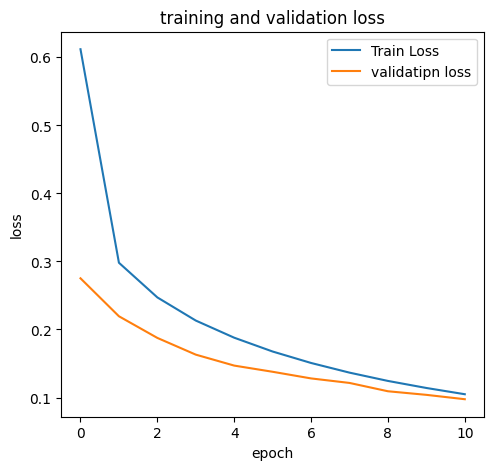

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='validatipn loss')
plt.title("training and validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [19]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [21]:
train_path = "dataset/MNIST(Ass2&3)/mnist_train.csv"
test_path  = "dataset/MNIST(Ass2&3)/mnist_test.csv"

train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

y_train=train_df.iloc[:,0].values
x_train=train_df.iloc[:,1:].values

y_test=test_df.iloc[:,0].values
x_test=test_df.iloc[:,1:].values

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [25]:
model=models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)             │ (None, 26, 26, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 13, 13, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ (None, 11, 11, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_3               │ (None, 5, 5, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_1 (Flatten)           │ (None, 1600)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_11 (Dense)              │ (None, 128)           │      204,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_12 (Dense)              │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history=model.fit(
    x_train,y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9515 - loss: 0.1620 - val_accuracy: 0.9857 - val_loss: 0.0547
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9845 - loss: 0.0504 - val_accuracy: 0.9845 - val_loss: 0.0615
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9880 - val_loss: 0.0483
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9893 - val_loss: 0.0412
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.9900 - val_loss: 0.0374
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9950 - loss: 0.0156 - val_accuracy: 0.9893 - val_loss: 0.0414
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9959 - loss: 0.0119 - val_accuracy: 0.9903 - val_loss: 0.0414
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9966 - loss: 0.0096 - val_accuracy: 0.

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 - 1s - 2ms/step - accuracy: 0.9916 - loss: 0.0319

Test Accuracy: 0.991599977016449
Test Loss: 0.03191599249839783


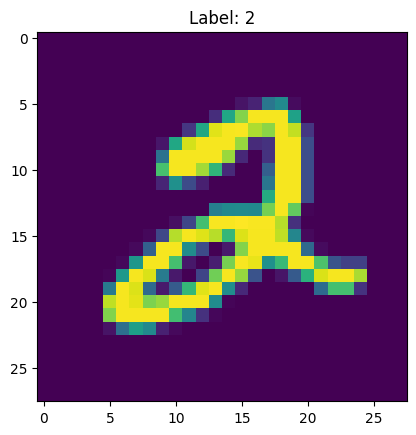

In [29]:
img = x_train[5].reshape(28, 28, 1)
plt.imshow(img)
plt.title(f"Label: {y_train[5]}")
plt.show()

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [40]:
train_path = "dataset/CIFR(Ass2&3)/train_data.csv"
test_path  = "dataset/CIFR(Ass2&3)/test_data.csv"

train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

y_train=train_df.iloc[:,-1].values
x_train=train_df.iloc[:,:-1].values

y_test=test_df.iloc[:,-1].values
x_test=test_df.iloc[:,:-1].values

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

print("Train shape:",x_train.shape)
print("Test shape:",x_test.shape)


Train shape: (50000, 3072)
Test shape: (10000, 3072)


In [41]:
model=models.Sequential([
    tf.keras.Input(shape=(32*32*3,)),
    layers.Dense(1024,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_13 (Dense)              │ (None, 1024)          │    3,146,752 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_14 (Dense)              │ (None, 512)           │      524,800 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_15 (Dense)              │ (None, 256)           │      131,328 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_16 (Dense)              │ (None, 10)            │        2,570 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
history=model.fit(
    x_train,y_train,
    epochs=10,
    batch_size=64,validation_split=0.1,shuffle=True
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3162 - loss: 1.8878 - val_accuracy: 0.3734 - val_loss: 1.7294
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3932 - loss: 1.6804 - val_accuracy: 0.3738 - val_loss: 1.7204
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4296 - loss: 1.5951 - val_accuracy: 0.4332 - val_loss: 1.6065
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4504 - loss: 1.5371 - val_accuracy: 0.4278 - val_loss: 1.5889
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4658 - loss: 1.4936 - val_accuracy: 0.4642 - val_loss: 1.5122
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4834 - loss: 1.4491 - val_accuracy: 0.4700 - val_loss: 1.4997
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4937 - loss: 1.4217 - val_accuracy: 0.4816 - val_loss: 1.4824
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5053 - loss: 1.3859 - 

In [44]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4843 - loss: 1.4695

Test Accuracy: 0.48429998755455017
Test Loss: 1.4694844484329224


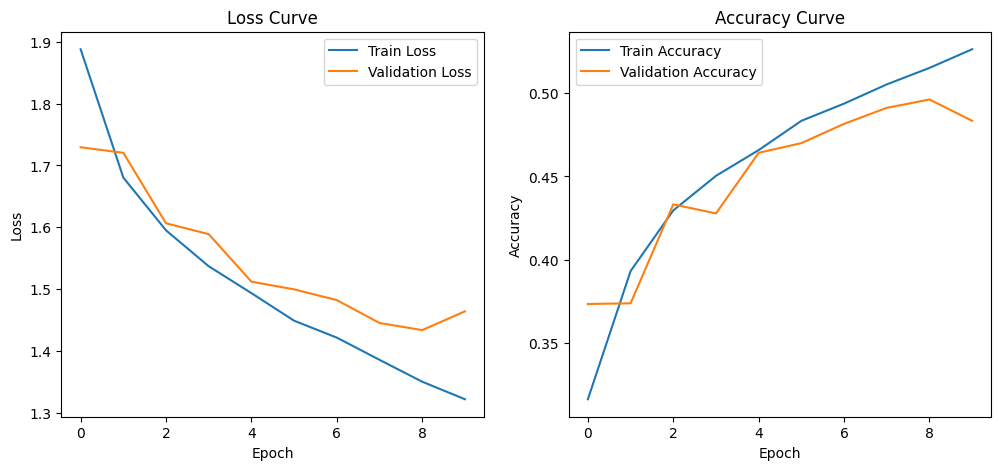

In [45]:
# f. Plot Loss and Accuracy

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

Text(0.5, 1.0, 'Label: 1')

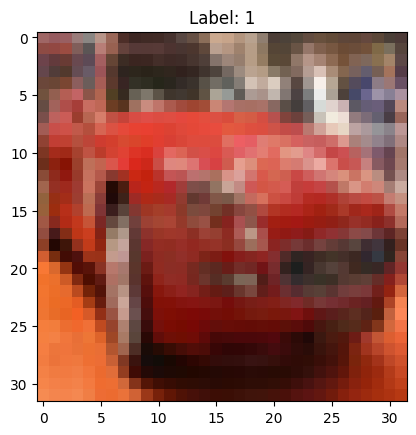

In [47]:
# sample image
img = x_train[5].reshape(32, 32, 3)
plt.imshow(img)
plt.title(f"Label: {y_train[5]}")

In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [54]:
train_path = "dataset/CIFR(Ass2&3)/train_data.csv"
test_path  = "dataset/CIFR(Ass2&3)/test_data.csv"


train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

y_train=train_df.iloc[:,-1].values
x_train=train_df.iloc[:,:-1].values

y_test=test_df.iloc[:,-1].values
x_test=test_df.iloc[:,:-1].values


x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

x_train=x_train.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,1)

print("Training data:", x_train.shape, y_train.shape)
print("Testing data:", x_test.shape, y_test.shape)

Training data: (50000, 32, 32, 3) (50000,)
Testing data: (30000, 32, 32, 1) (10000,)


In [55]:
model=models.Sequential([
    tf.keras.Input(shape=(32,32,3)),

    layers.Conv2D(32,(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [56]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 32)    │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (None, 16, 16, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_5 (Conv2D)             │ (None, 16, 16, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (None, 8, 8, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_6 (Conv2D)             │ (None, 8, 8, 128)     │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_6               │ (None, 4, 4, 128)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_2 (Flatten)           │ (None, 2048)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_17 (Dense)              │ (None, 128)           │      262,272 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_18 (Dense)              │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history=model.fit(
    x_train,y_train,
    epochs=20,batch_size=64,validation_split=0.1,verbose=1
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4515 - loss: 1.5036 - val_accuracy: 0.5478 - val_loss: 1.2704
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6205 - loss: 1.0753 - val_accuracy: 0.6728 - val_loss: 0.9485
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6814 - loss: 0.9105 - val_accuracy: 0.6708 - val_loss: 0.9576
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7237 - loss: 0.7889 - val_accuracy: 0.7138 - val_loss: 0.8331
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7564 - loss: 0.6958 - val_accuracy: 0.7344 - val_loss: 0.7763
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7805 - loss: 0.6236 - val_accuracy: 0.7306 - val_loss: 0.7921
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8044 - loss: 0.5569 - val_accuracy: 0.7402 - val_loss: 0.8018
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8296 - loss: 0.4861 - v

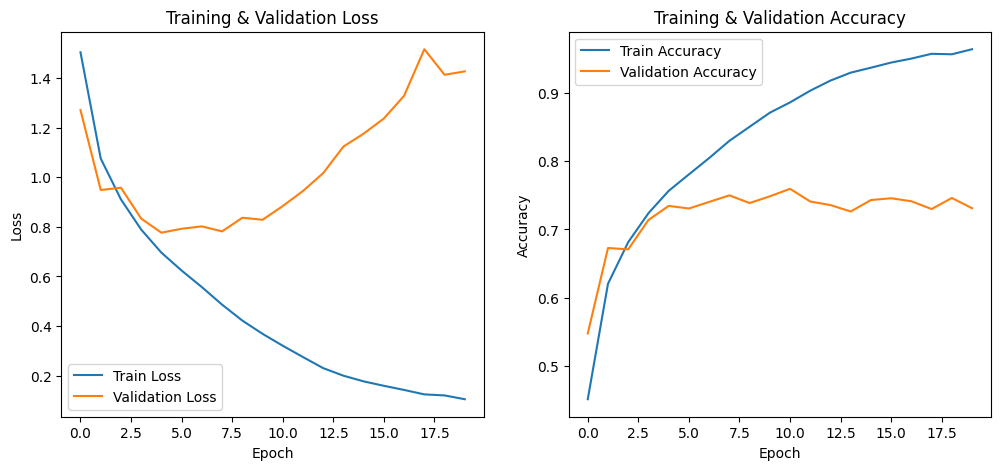

In [58]:
# OPTIONAL PLOTTING
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

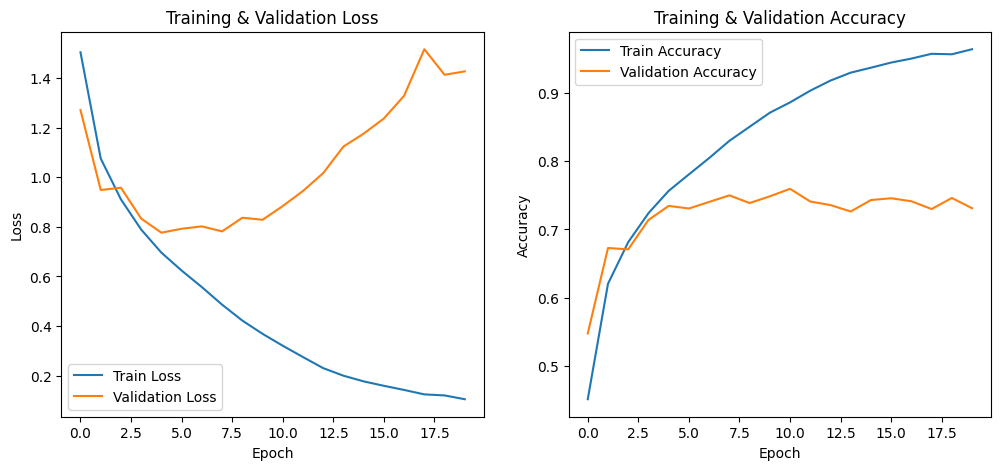

In [59]:
# OPTIONAL PLOTTING
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

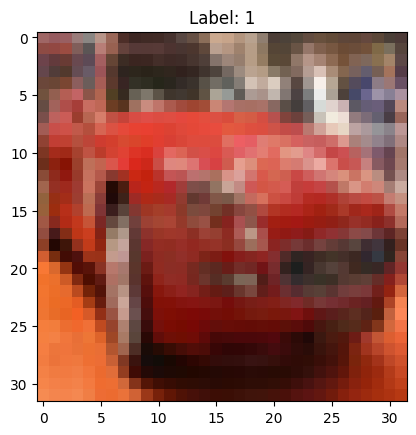

In [60]:
img = x_train[5].reshape(32, 32, 3)
plt.imshow(img)
plt.title(f"Label: {y_train[5]}")
plt.show()

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer

In [62]:
text = """The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. 
Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. 
The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 and 2.5 for COVID-19 virus, higher than for influenza. However, estimates for both COVID-19 and influenza viruses are very context and time-specific, making direct comparisons more difficult.  """

In [63]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])

In [64]:
word_index=tokenizer.word_index
index_word={v: k for k, v in word_index.items()}
vocab_size=len(word_index)+1

In [65]:
print("vocabulary size:",vocab_size)

vocabulary size: 103


In [66]:
sequence=tokenizer.texts_to_sequences([text])[0]
print("Tokenized Sequence Sample : ",sequence[:20])

Tokenized Sequence Sample :  [1, 38, 2, 8, 9, 39, 40, 41, 2, 42, 13, 1, 43, 23, 3, 44, 11, 24, 45, 46]


In [69]:
window_size=2
x_train=[]
y_train=[]

for i in range(window_size,len(sequence)-window_size):
    context=[
        sequence[i-2],sequence[i-1],
        sequence[i+1],sequence[i+2]
    ]
    target=sequence[i]
    x_train.append(context)
    y_train.append(target)

In [71]:
x_train=np.array(x_train)
y_train=np.array(y_train)

print("\nContexts:", x_train[:5])
print("Targets:", y_train[:5])


Contexts: [[ 1 38  8  9]
 [38  2  9 39]
 [ 2  8 39 40]
 [ 8  9 40 41]
 [ 9 39 41  2]]
Targets: [ 2  8  9 39 40]


In [73]:
embedding_dim=8

input_layer=Input(shape=(4,))
emb=Embedding(vocab_size,embedding_dim)(input_layer)
ctx_vector=GlobalAveragePooling1D()(emb)
output_layer=Dense(vocab_size,activation='softmax')(ctx_vector)

cbow_model=Model(input_layer,output_layer)

In [74]:
cbow_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
cbow_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 4)             │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ embedding (Embedding)         │ (None, 4, 8)          │          824 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ global_average_pooling1d      │ (None, 8)             │            0 │
│ (GlobalAveragePooling1D)      │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_19 (Dense)              │ (None, 103)           │          927 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 1,751 (6.84 KB)

 Trainable params: 1,751 (6.84 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
cbow_model.fit(x_train, y_train, epochs=200, verbose=0)
print("\nCBOW Training Complete!")


CBOW Training Complete!


In [77]:
embedding_matrix=cbow_model.layers[1].get_weights()[0]
print("\nWord Embeddings:")
for w, i in list(word_index.items())[:15]:
    print(w, "→", embedding_matrix[i])


Word Embeddings:
the → [-0.44653463  0.4223829   0.2923179  -0.41404852 -0.618211   -1.0856526
  0.38043538 -0.58596385]
of → [-0.54328775  0.5758961  -0.03823286 -1.1482066   0.6959524   0.95683783
 -0.02307903 -0.7926808 ]
influenza → [ 0.5017495  -0.17650099  0.23077194  0.3549548  -0.6845209  -0.7794672
 -0.5676143  -0.22584106]
covid → [ 1.5933986  -1.4290006   0.89018923 -1.0351187  -0.13906372 -0.82304025
 -0.16328688 -1.6124982 ]
19 → [ 0.39291272 -0.7184565   1.4439231  -0.7504322  -1.3960226  -0.98536277
 -1.0995278  -1.0991406 ]
virus → [-0.51839095 -0.0712981   0.5783145  -1.3495153   0.01309663 -1.1199294
 -0.63694376 -1.3681625 ]
for → [-0.03703173  0.15158218  0.74587303  0.3047773  -1.0344077  -1.0872761
 -0.5988842  -0.2567888 ]
transmission → [-0.58440506  1.0990685   0.91430545 -0.54490197 -0.07202048 -0.45771277
 -0.35578182 -0.578594  ]
is → [-0.10516459  0.22083491 -0.00678307 -1.2807871   0.8905607   0.50719666
  0.14651817 -0.5302161 ]
to → [-0.7959502  -0.3614

In [78]:
def predict_missing(w1, w2, w3, w4):
    try:
        seq = np.array([word_index[w1], word_index[w2], word_index[w3], word_index[w4]]).reshape(1,4)
    except KeyError as e:
        return f"Word not found in vocabulary: {e}"

    pred = cbow_model.predict(seq, verbose=0)
    pred_id = int(np.argmax(pred))
    return index_word[pred_id]

In [79]:
print("\nPredictions:")
print(predict_missing("the", "speed", "transmission", "is"))
print(predict_missing("the", "serial", "for", "virus"))


Predictions:
of
the


In [94]:
print(predict_missing("very", "context", "between", "contrast"))

influenza


In [112]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Lambda,Dense
import tensorflow.keras.backend as K

with open("dataset/CBOW(Ass5)/CBOW.txt","r",encoding="utf-8") as f:
    text=f.read()

print(text)

The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. 

Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. 

The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 

In [120]:
tok=Tokenizer()
tok.fit_on_texts([text])
seq=tok.texts_to_sequences([text])[0]
vocab_size=len(tok.word_index)+1

word_index=tok.word_index
index_word={i: w for w, i in word_index.items()}

print("Vocabulary Size:",vocab_size)
print("Sequence:",seq)

Vocabulary Size: 103
Sequence: [1, 38, 2, 8, 9, 39, 40, 41, 2, 42, 13, 1, 43, 23, 3, 44, 11, 24, 45, 46, 47, 1, 14, 25, 48, 10, 26, 2, 27, 12, 11, 24, 15, 16, 1, 14, 13, 49, 50, 17, 4, 5, 6, 1, 15, 16, 7, 4, 5, 6, 9, 51, 10, 18, 19, 52, 20, 28, 7, 3, 6, 1, 15, 16, 9, 29, 20, 30, 53, 31, 3, 32, 54, 55, 17, 4, 5, 56, 8, 33, 1, 57, 29, 19, 20, 2, 58, 59, 60, 61, 62, 8, 63, 2, 1, 6, 64, 1, 26, 2, 27, 21, 9, 11, 34, 35, 2, 8, 7, 3, 33, 65, 28, 66, 22, 67, 31, 68, 22, 69, 70, 32, 71, 4, 5, 6, 72, 73, 74, 75, 10, 76, 77, 78, 79, 30, 80, 81, 82, 10, 18, 11, 34, 35, 2, 8, 1, 83, 36, 21, 1, 36, 2, 84, 85, 86, 25, 87, 88, 89, 21, 9, 90, 10, 18, 13, 37, 12, 37, 19, 7, 4, 5, 6, 91, 17, 7, 3, 92, 93, 7, 94, 4, 5, 12, 3, 23, 22, 95, 96, 12, 14, 97, 98, 99, 100, 101, 102]


In [114]:
window=2
x,y=[],[]

for i in range(window,len(seq)-window):
    context=seq[i-window:i]+seq[i+1:i+window+1]
    x.append(context)
    y.append(seq[i])

In [115]:
x=np.array(x)
y=np.array(y)
print("\nContext samples:\n", x[:5])
print("\nTarget samples:\n", y[:5])


Context samples:
 [[ 1 38  8  9]
 [38  2  9 39]
 [ 2  8 39 40]
 [ 8  9 40 41]
 [ 9 39 41  2]]

Target samples:
 [ 2  8  9 39 40]


In [116]:
model=Sequential([
    Embedding(vocab_size,8),
    Lambda(lambda x: K.mean(x,axis=1)),
    Dense(vocab_size,activation='softmax')
])

In [117]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam'
)

model.fit(
    x,y,
    epochs=200,verbose=0
)

model.summary()

print("Model Trained")

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)       │ (None, 4, 8)          │          824 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lambda_2 (Lambda)             │ (None, 8)             │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_22 (Dense)              │ (None, 103)           │          927 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 5,255 (20.53 KB)

 Trainable params: 1,751 (6.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,504 (13.69 KB)

Model Trained


In [119]:
eeddings=model.layers[0].get_weights()[0]

print("\n word Embedding")
for word,idx in word_index.items():
    print(f"{word}->{eeddings[idx]}")


 word Embedding
the->[ 0.61964124  1.0073678  -0.93988895 -1.3714025   0.80399054 -0.8903427
 -0.6209255  -0.06193003]
of->[ 1.000958   -0.40696535 -0.25252628  0.8668244   1.4599605  -0.4000113
 -1.4115844  -0.63569236]
influenza->[ 0.2582144   0.8613647  -0.53245914 -0.45247957 -0.02412268  0.67635655
 -0.28732365  0.8557113 ]
covid->[-1.3988483   0.31366894 -0.6756947  -1.0598139  -0.10233728  0.8224801
 -1.111094    0.9014879 ]
19->[-0.9890686   1.0040001  -1.1389982  -0.96784055 -0.11357695  1.1130146
 -1.332396   -0.35001984]
virus->[-0.5196651   0.8218599  -0.5783692  -0.5744831  -0.42703244  0.74471194
 -1.4339901  -1.3748147 ]
for->[ 0.03031098  0.991355   -0.7405195  -1.299689   -0.5966939   0.9205149
 -0.6485945  -0.0770066 ]
transmission->[ 0.49027398  0.27345076 -0.41842118 -0.6014185   0.18451305 -0.45332688
 -0.8256296  -0.7397186 ]
is->[-0.07096261 -0.47714818  0.1356619  -0.3005013   0.90457416 -0.57963187
 -0.6978785  -0.7034506 ]
to->[-0.25030255 -0.66158503  0.3666